# Trabajando con `NumPy`

### Inicialización

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ajuste de funciones polinomiales usando `np.polyfit`
Si simplemente necesitamos hacer ajustes básicos de polinomios, lo podemos hacer fácilmente sólo con `numpy`:

### Ajuste polinomial de mínimos cuadrados.

Ajuste un polinomio `p (x) = p [0] * x ** deg + ... + p [deg]` de grados [deg] a los puntos $(x, y)$. Devuelve un vector de coeficientes `p` que minimiza el error al cuadrado en el orden $deg$, $deg-1$, $\dots$, $0$.

- Crearemos unos datos para trabajar con ellos

In [2]:
n = 50                                        # haremos 50 datos con ruido aleatorio
jitter_amp = 4.0                              # esto es la amplitud del ruido
x = np.linspace(0,10,n)                       # generamos la variable x
jitter = jitter_amp*(np.random.random(n)-0.5) # calculamos el ruido para cada dato
y = x + jitter                                # y calculamos el dato ruidoso

Ahora graficamos los dato ruidosos

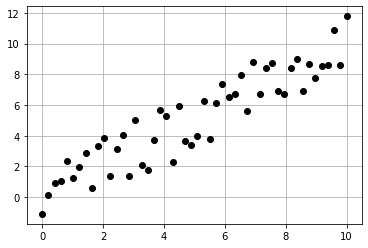

In [3]:
plt.plot(x,y,'ok')
plt.grid()

### Ajuste con polyfit

ahora estamos en condiciones de realizar el ajuste, utlizando la libreria `numpy` y de allí, la función de ajuste `polyfit`, la cual ajusta polinomios de grado $n$, `np.polyfit(x,y,n)`.

In [4]:
a = np.polyfit(x,y,1)    #  el número 1 significa que usaremos un polin de 1er grado
a

array([0.94759248, 0.3781455 ])

## Observemos los Resultados

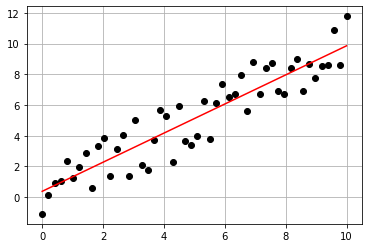

In [5]:
plt.plot(x,y,'ok')
t = np.linspace(0,10,n) # t es la variable independiente entre (0,12)
y_t = a[0]*t + a[1]     # y_t sería y(t), y depende de t
plt.plot(t, y_t, 'r')   #  'r' es de red, 'b' de blue, etc
plt.grid()

### Veamos otros ejemplo

In [6]:
# Datos experimentales
x = np.array([ 0.,  1.,  2.,  3.,  4.])
y = np.array([ 10.2 ,  12.1,  15.5 ,  18.3,  20.6 ])

# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(x, y, 1)

print(p)
# imprime [ 2.7   9.94]

[2.7  9.94]


en este ejemplo `np.polyfit()` devuelve la lista de parámetros p de la recta, por lo que el modelo lineal $f(x)=ax+b$ de nuestros datos será:

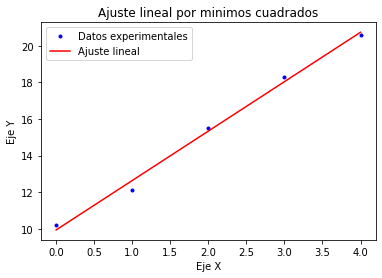

In [7]:
# Valores de y calculados del ajuste
y_ajuste = p[0]*x + p[1]

# Dibujamos los datos experimentales
p_datos, = plt.plot(x, y, 'b.')

# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(x, y_ajuste, 'r-')

plt.title('Ajuste lineal por minimos cuadrados')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.legend(('Datos experimentales', 'Ajuste lineal'), loc="upper left")
plt.show()

Como se ve en este ejemplo, la salida por defecto de `np.polyfit()}` es un array con los parámetros del ajuste. Sin embargo, si se pide una salida detalla con el parámetro `full=True` (por defecto `full=False`), el resultado es una tupla con el array de parámetros, el residuo, el rango, los valores singulares y la condición relativa. Nos interesa especialmente el residuo del ajuste, que es la suma cuadrática de todos los resíduos $$\sum_{i=1}^{n}|y_i−f(x_i)|^2$$

Para el ejemplo anterior tendríamos lo siguiente:

In [8]:
# Ajuste a una recta, con salida de datos
# print(x, y)
resultado = np.polyfit(x, y, 1, full=True)
"""
Imprime tupla
(array([ 2.7 ,  9.94]),                  Parámetros del ajuste
 array([ 0.472]),                        Suma de residuos
 2,                                      Rango de la matriz del sistema
 array([1.34777468, 0.42837299]),        Valores singulares
 1.1102230246251565e-15)                 rcond
"""
#  los parámetros, el residuo, el rango, los valores singulares y la condición relativa
print(resultado)

(array([2.7 , 9.94]), array([0.472]), 2, array([1.34777468, 0.42837299]), 1.1102230246251565e-15)


`rcond` El valor de `rcond` no se trata realmente de la calidad del ajuste, sino describe el proceso mediante el cual se obtuvo el ajuste, es decir, una solución de mínimos cuadrados de un sistema lineal. Este valor se devuelve al usuario para su información.

`rcond` se utiliza para el truncamiento en matrices mal condicionadas. 
Corte para pequeños valores singulares. Los valores singulares menores o iguales a `rcond * greatest_singular_value` se establecen en cero. 

`rcond` *opcional*

Número de condición relativa del ajuste. Se ignorarán los valores singulares menores que este en relación con el valor singular más grande. El valor predeterminado es len (x) * eps, donde eps es la precisión relativa del tipo flotante, aproximadamente 2e-16 en la mayoría de los casos.

In [9]:
# Datos experimentales
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.95, 17.27, 86.07, 268.55, 603.72, 1233.62, 2393.58, 4229.55, 6689.21, 9550.65])

# Ajuste a una recta (polinomio de grado n)
n = 1
p = np.polyfit(x, y, n)

print(p)
# imprime [ 2.7   9.94]

[  971.85012121 -2837.65866667]


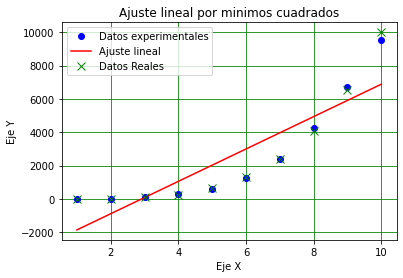

In [10]:
# Valores de y calculados del ajuste
if n == 4:
    y_ajuste = p[0] * x**4 + p[1] * x**3 + p[2] * x**2 + p[3] * x + p[4]
elif n == 3:
    y_ajuste = p[0] * x**3 + p[1] * x**2 + p[2] * x**1 + p[3]
elif n == 2:
    y_ajuste = p[0] * x**2 + p[1] * x**1 + p[2]
elif n == 1:
    y_ajuste = p[0] * x + p[1]
    
z_real  = x**4+2
# Dibujamos los datos experimentales
p_datos, = plt.plot(x, y, 'bo')
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(x, y_ajuste, 'r-')
p_reales, = plt.plot(x, z_real, 'gx', ms=8)

plt.title('Ajuste lineal por minimos cuadrados')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.legend(('Datos experimentales', 'Ajuste lineal','Datos Reales'), loc="upper left")
#plt.figure(figsize=(18, 3))
plt.grid()
plt.grid(b=True, color='g')
plt.show()